<a href="https://colab.research.google.com/github/DivyaDileep2210/Projects/blob/main/int_superstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Problem Statement

Excel file of sales data extracted from Tabeaue community forum.

The data contains mostly categorical variables and components of the vectors from the description column. The index column is a timeseries format.

The major objective of this section is to understand the general trends in the data, and gain some quick insights, and then predict and forcast the Sales of the category "Technology" of the given sales data.The statistical significance of these observations will be also tested in 'Exploratory Data Analysis'.

In [ ]:
#Import all required packages:
import warnings
warnings.filterwarnings("ignore")
import os
import itertools
import pandas as pd
import numpy as np
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 5

In [ ]:
#Specify the path of the dataset
location=("/content/Superstore.xlsx") 

In [ ]:
data_original = pd.read_excel(location)

In [ ]:
data_original

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1.0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136
1,2.0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.00,219.5820
2,3.0,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714
3,4.0,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310
4,5.0,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990.0,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180.0,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3.0,0.20,4.1028
9990,9991.0,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2.0,0.00,15.6332
9991,9992.0,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2.0,0.20,19.3932
9992,9993.0,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4.0,0.00,13.3200


In [ ]:
data_original.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1.0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136
1,2.0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.00,219.5820
2,3.0,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714
3,4.0,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310
4,5.0,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.20,2.5164


In [ ]:
# Shape of the dataset
data_original.shape

(9994, 21)

In [ ]:
# Categories of sales data
data_original.Category.value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [ ]:
data_original.Region.value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [ ]:
#Get the rows with Category "Technology"
Technology =data_original.loc[data_original['Category']== 'Technology']
Technology

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7,8.0,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6.0,0.2,90.7152
11,12.0,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032.0,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.424,4.0,0.2,68.3568
19,20.0,CA-2014-143336,2014-08-27,2014-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,...,94109.0,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.480,3.0,0.2,16.0110
26,27.0,CA-2016-121755,2016-01-16,2016-01-20,Second Class,EH-13945,Eric Hoffmann,Consumer,United States,Los Angeles,...,90049.0,West,TEC-AC-10003027,Technology,Accessories,Imation 8GB Mini TravelDrive USB 2.0 Flash Drive,90.570,3.0,0.0,11.7741
35,36.0,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080.0,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544,7.0,0.2,123.4737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9983,9984.0,US-2016-157728,2016-09-22,2016-09-28,Standard Class,RC-19960,Ryan Crowe,Consumer,United States,Grand Rapids,...,49505.0,Central,TEC-PH-10001305,Technology,Phones,Panasonic KX TS208W Corded phone,97.980,2.0,0.0,27.4344
9986,9987.0,CA-2016-125794,2016-09-29,2016-10-03,Standard Class,ML-17410,Maris LaWare,Consumer,United States,Los Angeles,...,90008.0,West,TEC-AC-10003399,Technology,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.240,1.0,0.0,15.2208
9987,9988.0,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605.0,South,TEC-AC-10001539,Technology,Accessories,Logitech G430 Surround Sound Gaming Headset wi...,79.990,1.0,0.0,28.7964
9988,9989.0,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605.0,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5.0,0.0,55.6470


In [ ]:
#Fetch the range of dates in which order is placed for the category "Technology"


In [ ]:
Technology['Order Date'].min(), Technology['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

# Data Exploration

In [ ]:
Technology.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
# columns to drop
cols = ['Row ID', 
        'Order ID', 
        'Ship Date', 
        'Ship Mode', 
        'Customer ID', 
        'Customer Name', 
        'Segment', 
        'Country', 
        'City', 
        'State', 
        'Postal Code', 
        'Region', 
        'Product ID', 
        'Category', 
        'Sub-Category', 
        'Product Name', 
        'Quantity', 
        'Discount', 
        'Profit']

In [ ]:
Technology.drop(cols, axis=1, inplace=True)

In [ ]:
Technology

,Order Date,Sales
7,2014-06-09,907.152
11,2014-06-09,911.424
19,2014-08-27,213.480
26,2016-01-16,90.570
35,2016-12-08,1097.544
...,...,...
9983,2016-09-22,97.980
9986,2016-09-29,36.240
9987,2017-11-17,79.990
9988,2017-11-17,206.100


In [ ]:
# check for null values
Technology.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [ ]:
Technology.columns

Index(['Order Date', 'Sales'], dtype='object')

In [ ]:
#Check if more than one sales data is there for a date
temp = Technology.groupby('Order Date')['Sales'].size() 
temp

Order Date
2014-01-06    2
2014-01-09    1
2014-01-13    1
2014-01-15    1
2014-01-16    1
             ..
2017-12-25    4
2017-12-27    1
2017-12-28    1
2017-12-29    1
2017-12-30    1
Name: Sales, Length: 824, dtype: int64

In [ ]:
temp[temp > 1].sort_values(ascending=False)

Order Date
2017-09-24    10
2017-07-03     9
2017-11-12     8
2016-11-24     8
2017-11-13     8
              ..
2016-03-06     2
2016-03-01     2
2016-02-22     2
2016-02-21     2
2016-06-04     2
Name: Sales, Length: 473, dtype: int64

In [ ]:
# aggregate sales by date
Technology = Technology.groupby('Order Date')['Sales'].sum().reset_index()
Technology

,Order Date,Sales
0,2014-01-06,1147.940
1,2014-01-09,31.200
2,2014-01-13,646.740
3,2014-01-15,149.950
4,2014-01-16,124.200
...,...,...
819,2017-12-25,401.208
820,2017-12-27,164.388
821,2017-12-28,14.850
822,2017-12-29,302.376


In [ ]:
# Indexing with Time Series Data
Technology = Technology.set_index('Order Date')
Technology.index

DatetimeIndex(['2014-01-06', '2014-01-09', '2014-01-13', '2014-01-15',
               '2014-01-16', '2014-01-20', '2014-01-26', '2014-02-01',
               '2014-02-02', '2014-02-06',
               ...
               '2017-12-18', '2017-12-21', '2017-12-22', '2017-12-23',
               '2017-12-24', '2017-12-25', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=824, freq=None)

In [ ]:
#Take 10 samples from the indexed data
Technology.sample(10)

,Sales
Order Date,
2017-06-08,488.640
2015-07-16,599.900
2017-08-18,2401.150
2015-11-23,307.980
2014-06-09,1890.552
2017-08-21,465.148
2016-10-25,783.960
2015-05-22,3749.048
2017-07-08,191.900


<Figure size 1152x432 with 0 Axes>

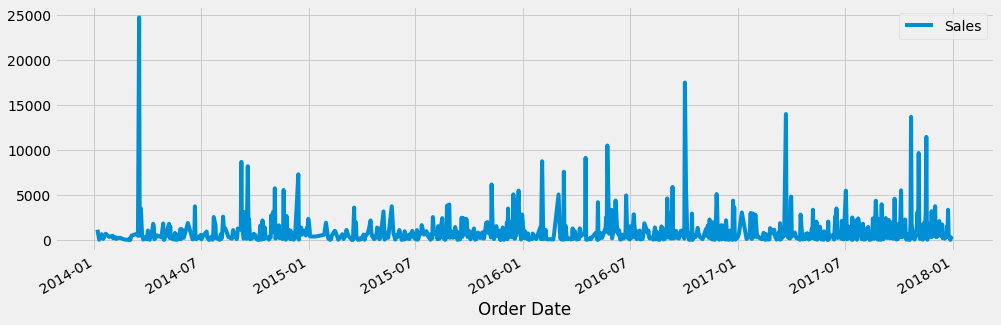

In [ ]:
plt.figure(figsize=(16, 6));
Technology.plot();

In [ ]:
pd.DatetimeIndex(Technology.index).year

Int64Index([2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Order Date', length=824)

In [ ]:
pd.DatetimeIndex(Technology.index).month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  2,  2,  2,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='Order Date', length=824)

In [ ]:
pd.DatetimeIndex(Technology.index).day

Int64Index([ 6,  9, 13, 15, 16, 20, 26,  1,  2,  6,
            ...
            18, 21, 22, 23, 24, 25, 27, 28, 29, 30],
           dtype='int64', name='Order Date', length=824)

In [ ]:
#add a few more columns to Technology, containing the year, month, and weekday name.
# Add columns with year, month, and weekday name
Technology['Year']         = pd.DatetimeIndex(Technology.index).year
Technology['Month']        = pd.DatetimeIndex(Technology.index).month
Technology['day Name'] = pd.DatetimeIndex(Technology.index).day_name()
Technology

,Sales,Year,Month,day Name
Order Date,,,,
2014-01-06,1147.940,2014,1,Monday
2014-01-09,31.200,2014,1,Thursday
2014-01-13,646.740,2014,1,Monday
2014-01-15,149.950,2014,1,Wednesday
2014-01-16,124.200,2014,1,Thursday
...,...,...,...,...
2017-12-25,401.208,2017,12,Monday
2017-12-27,164.388,2017,12,Wednesday
2017-12-28,14.850,2017,12,Thursday


In [ ]:
#Technology.drop(['Weekday Name'],axis=1, inplace=True)

In [ ]:
Technology

,Sales,Year,Month,day Name
Order Date,,,,
2014-01-06,1147.940,2014,1,Monday
2014-01-09,31.200,2014,1,Thursday
2014-01-13,646.740,2014,1,Monday
2014-01-15,149.950,2014,1,Wednesday
2014-01-16,124.200,2014,1,Thursday
...,...,...,...,...
2017-12-25,401.208,2017,12,Monday
2017-12-27,164.388,2017,12,Wednesday
2017-12-28,14.850,2017,12,Thursday


In [ ]:
# Display a random sampling of 5 rows
Technology.sample(10, random_state=0)

,Sales,Year,Month,day Name
Order Date,,,,
2014-07-23,2555.084,2014,7,Wednesday
2014-03-28,302.376,2014,3,Friday
2014-02-02,180.960,2014,2,Sunday
2015-10-20,239.970,2015,10,Tuesday
2017-12-27,164.388,2017,12,Wednesday
2017-10-05,5520.506,2017,10,Thursday
2017-07-21,2180.644,2017,7,Friday
2015-09-03,247.840,2015,9,Thursday
2015-12-18,166.240,2015,12,Friday


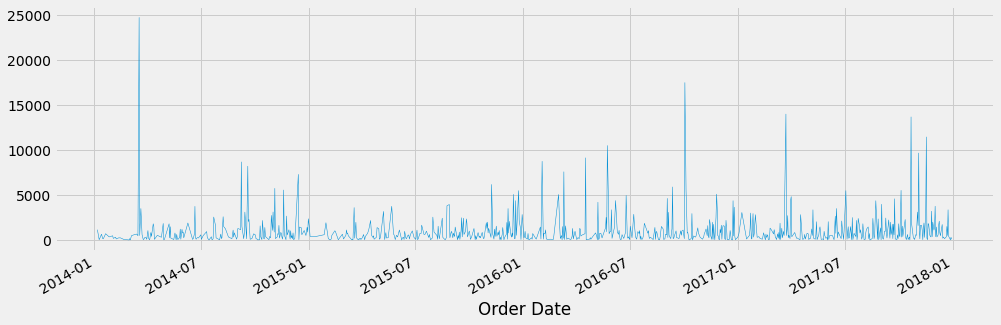

In [ ]:
# create a line plot of the full time series of daily sales, 
# using the DataFrame’s plot() method.
Technology['Sales'].plot(linewidth=0.5);

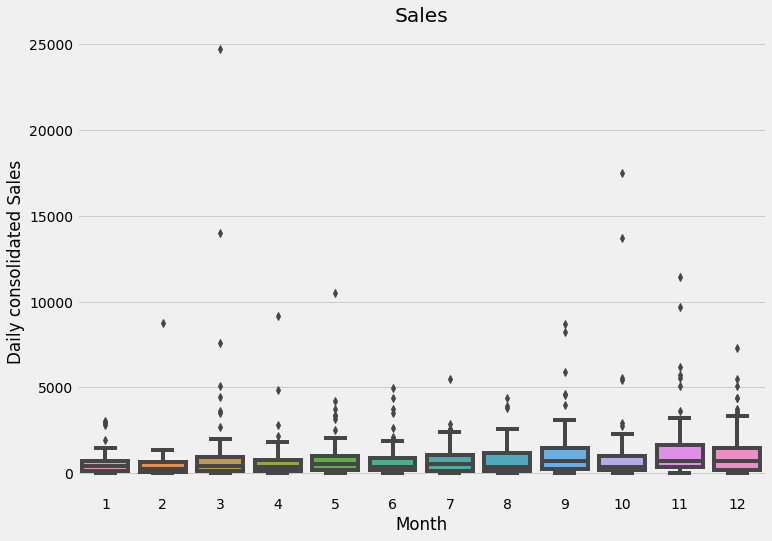

In [ ]:
fig, ax = plt.subplots(figsize=(11, 8))

sns.boxplot(data=Technology, x='Month', y='Sales', ax=ax)

ax.set_title('Sales')

ax.set_ylabel('Daily consolidated Sales');

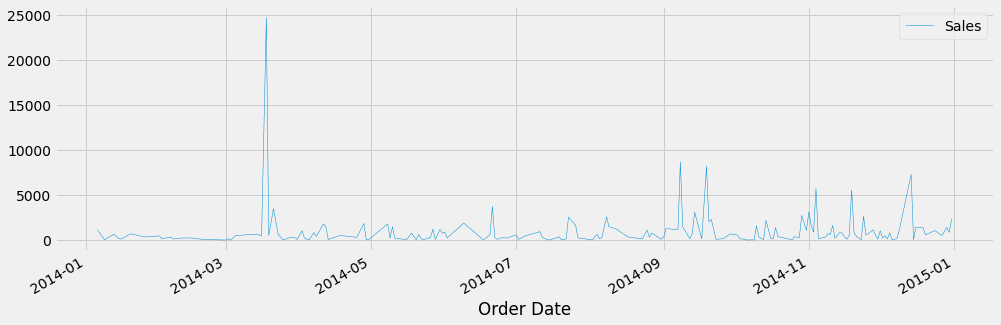

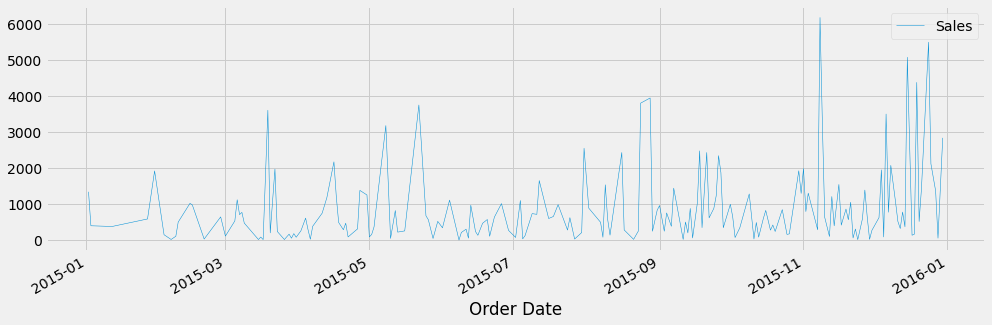

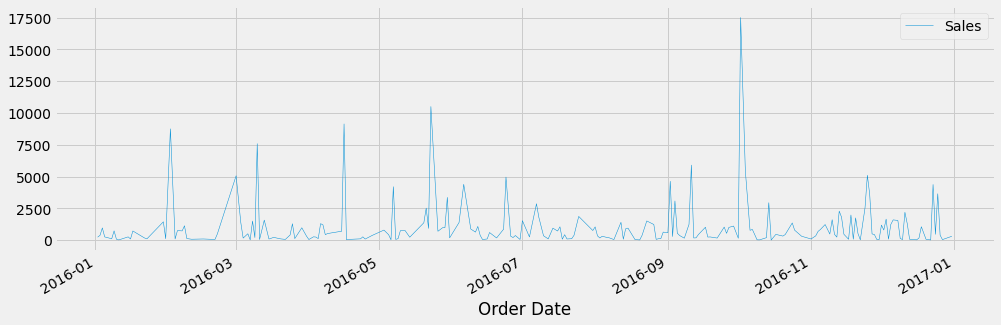

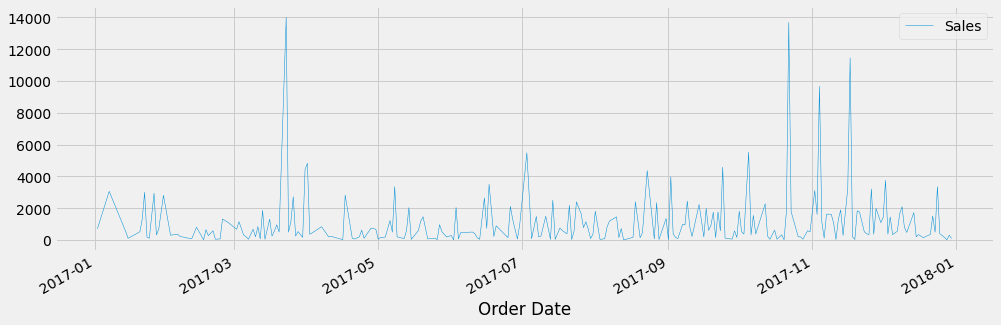

In [ ]:
cols_plot = ['Sales']

Technology.loc['2014'][cols_plot].plot(linewidth=0.5);
Technology.loc['2015'][cols_plot].plot(linewidth=0.5);
Technology.loc['2016'][cols_plot].plot(linewidth=0.5);
Technology.loc['2017'][cols_plot].plot(linewidth=0.5);

#### observation:

- the trend, seasonality is not obvious from the above plots, as there are a lots of data points.

- There seems to indication of seasonality at the end of the year 2015 and 2017, but we can not see the certain seasonality.

- we can roll-up the data, weekly & monthly and then re-plot

In [ ]:
# weekly sales
data_columns = ['Sales']

# Resample to weekly frequency, aggregating with mean
Technology_weekly = Technology[data_columns].resample('W').sum()
Technology_weekly.head()

,Sales
Order Date,
2014-01-12,1179.14
2014-01-19,920.89
2014-01-26,1043.26
2014-02-02,649.86
2014-02-09,421.92


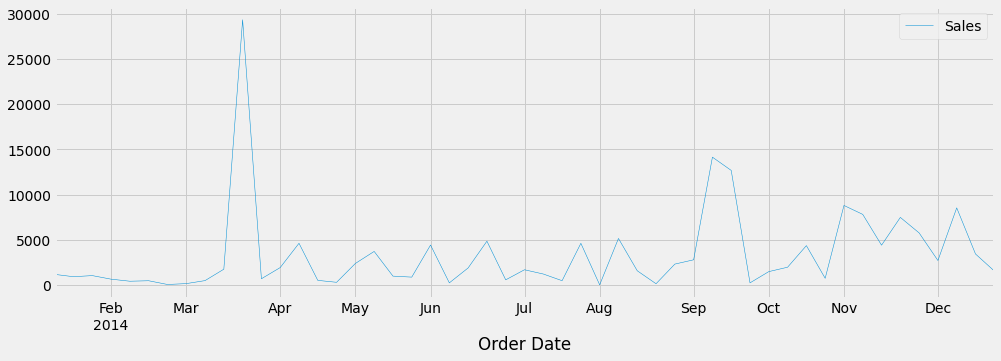

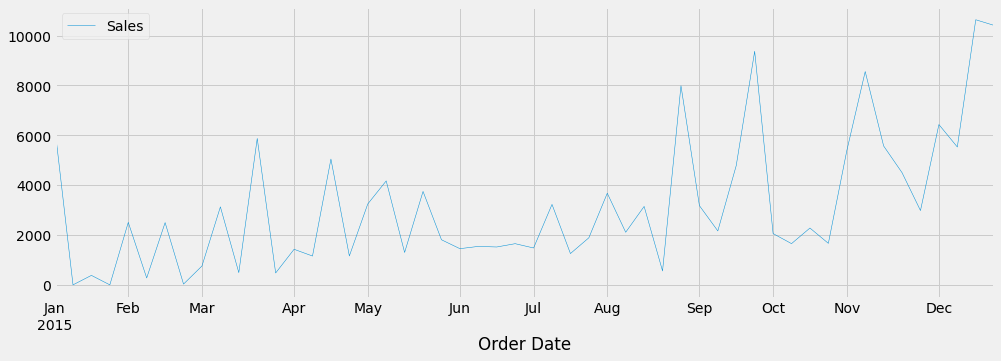

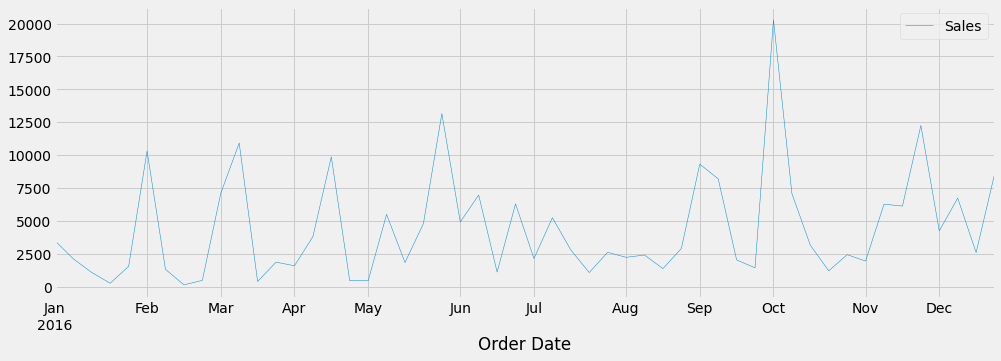

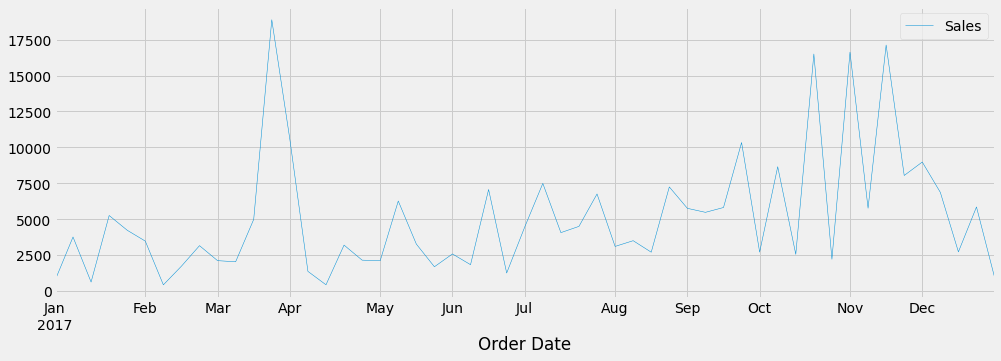

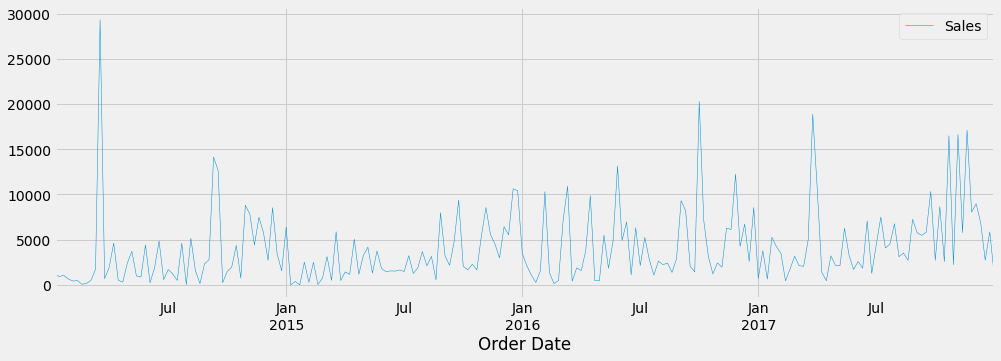

In [ ]:
cols_plot = ['Sales']

Technology_weekly.loc['2014'][cols_plot].plot(linewidth=0.5);
Technology_weekly.loc['2015'][cols_plot].plot(linewidth=0.5);
Technology_weekly.loc['2016'][cols_plot].plot(linewidth=0.5);
Technology_weekly.loc['2017'][cols_plot].plot(linewidth=0.5);
Technology_weekly[cols_plot].plot(linewidth=0.5);

In [ ]:
# monthly sales
data_columns = ['Sales']

# Resample to weekly frequency, aggregating with mean
Technology_monthly = Technology[data_columns].resample('M').sum()
Technology_monthly.head(3)

,Sales
Order Date,
2014-01-31,3143.290
2014-02-28,1608.510
2014-03-31,32511.174


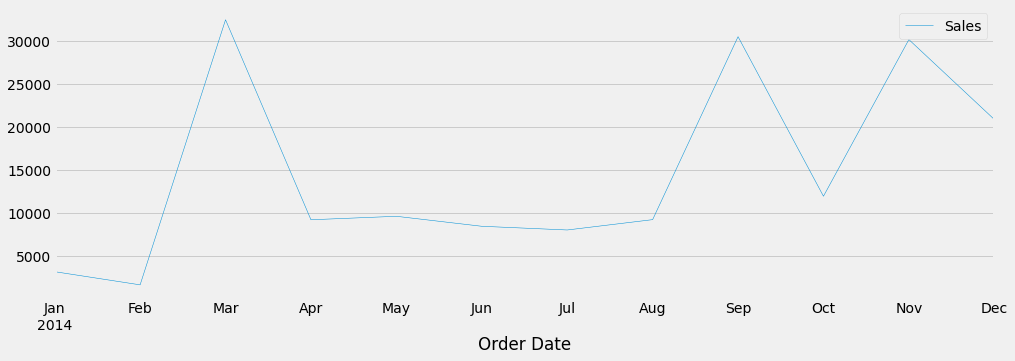

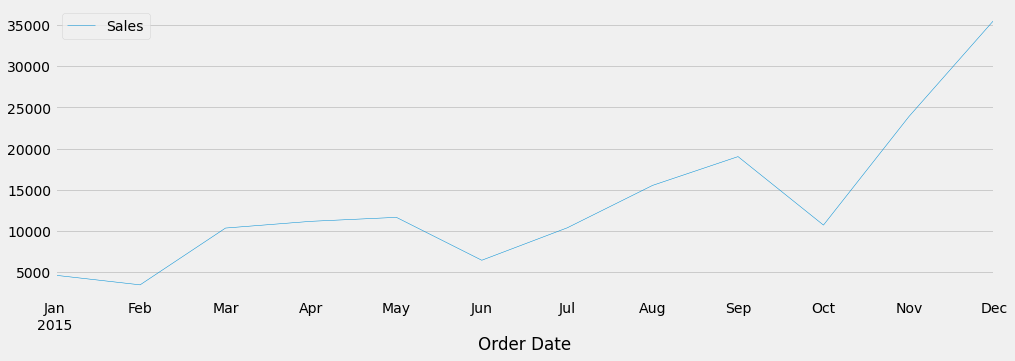

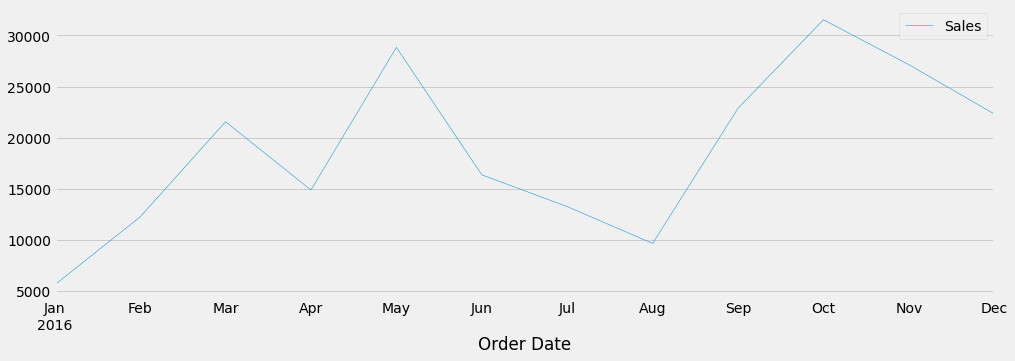

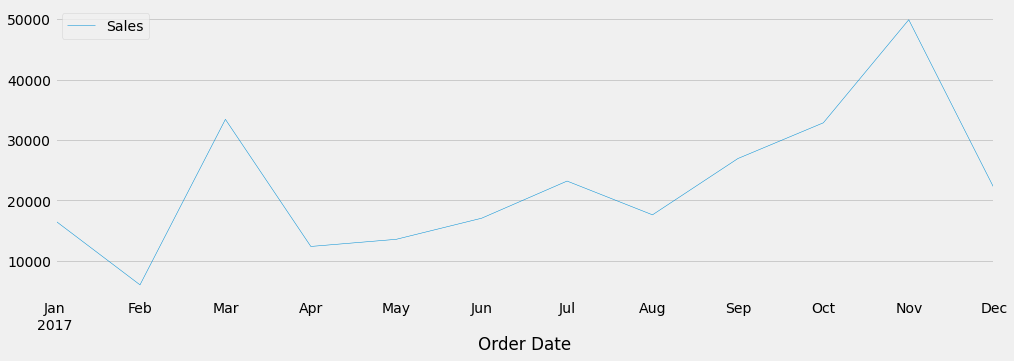

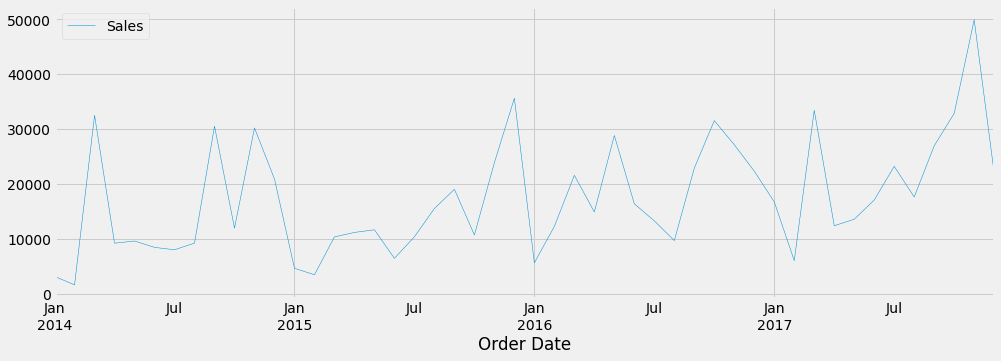

In [ ]:
cols_plot = ['Sales']

Technology_monthly.loc['2014'][cols_plot].plot(linewidth=0.5);
Technology_monthly.loc['2015'][cols_plot].plot(linewidth=0.5);
Technology_monthly.loc['2016'][cols_plot].plot(linewidth=0.5);
Technology_monthly.loc['2017'][cols_plot].plot(linewidth=0.5);
Technology_monthly[cols_plot].plot(linewidth=0.5);

#### observation

- Every year, there is slight uptrend visible
- sales up in the months of Sep-Oct-Nov
- Consolidated 4 years - slight uptrend in sales numbers
- sales picks up in the last QTR of every calender year(Except December), indicates seasonality


In [ ]:
# define a function to check trend and plot

def detect_trend (X_df):
    coefficients, residuals, _, _, _ = np.polyfit(range(len(X_df)),
                                                  X_df,
                                                  1,
                                                  full=True)

    mse = residuals[0]/(len(X_df))
    nrmse = np.sqrt(mse)/(X_df.max() - X_df.min())

    print('Slope ' + str(coefficients[0]))
    print('NRMSE: ' + str(nrmse))

    plt.xticks(rotation=90)
    plt.plot(X_df, 
             marker='.', 
             linestyle='-', 
             linewidth=0.5,
             color='blue',  
             label='Original')
    
    plt.plot([coefficients[0]*x + coefficients[1] for x in range(len(X_df))],
             marker='o', 
             markersize=8, 
             linestyle='-', 
             linewidth=0.5,
             color='orange',
             label='Regression line');
    plt.legend()
    plt.show()

Slope 1446.4374930069928
NRMSE: 0.29987748261793223


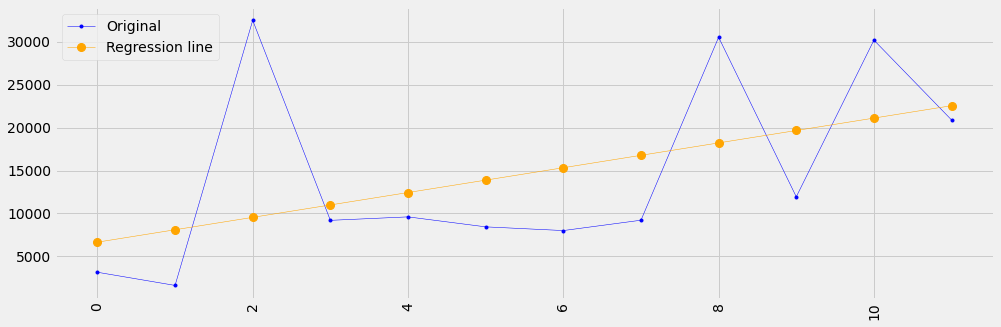

Slope 2035.9554020979017
NRMSE: 0.15674028754402083


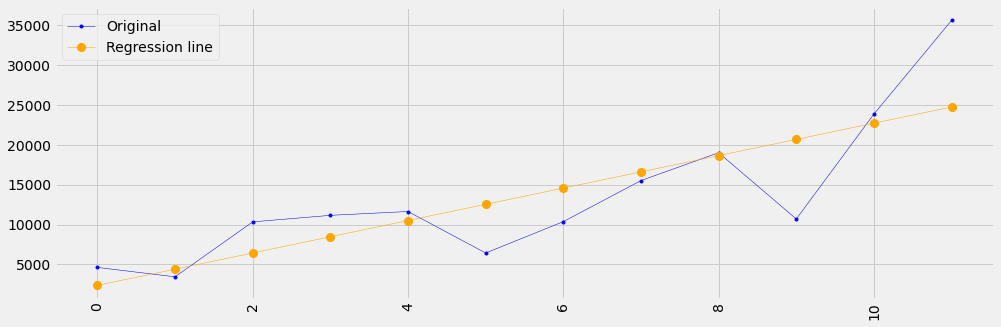

Slope 1282.54586013986
NRMSE: 0.24543983973553118


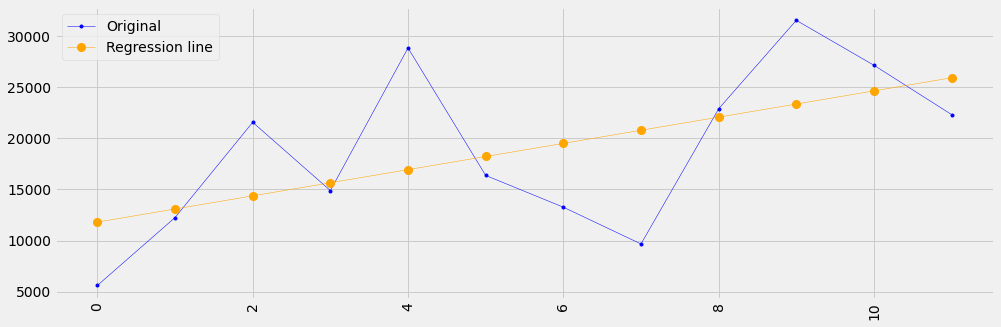

Slope 1887.7205699300698
NRMSE: 0.21100869791110768


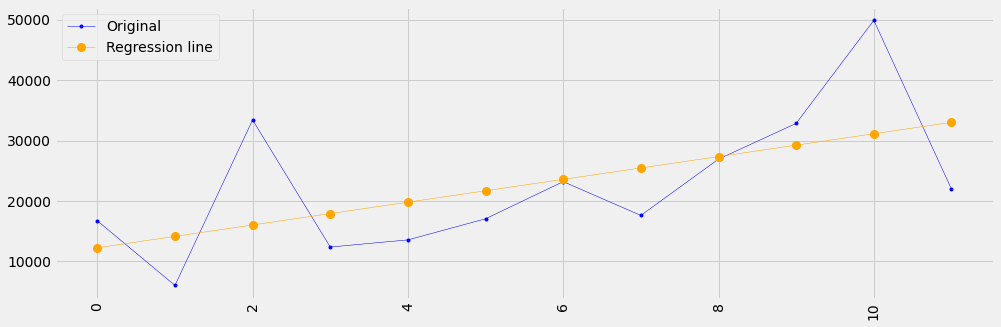

Slope [333.14990377]
NRMSE: 0.19109167565064264


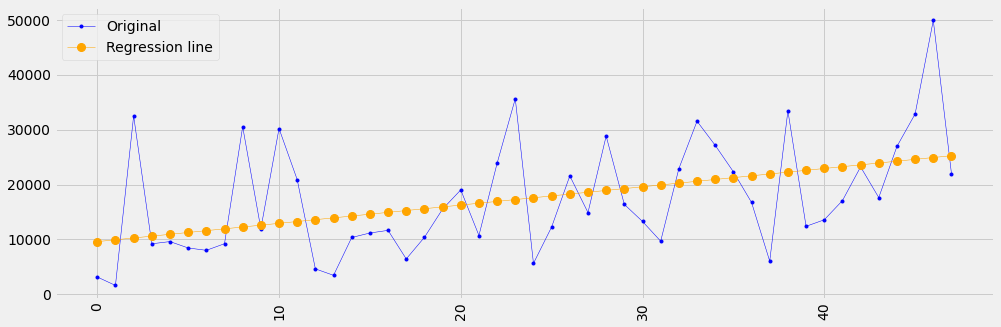

In [ ]:
# check for trend
cols_plot = ['Sales']

detect_trend(Technology_monthly.loc['2014']['Sales'].values)
detect_trend(Technology_monthly.loc['2015']['Sales'].values)
detect_trend(Technology_monthly.loc['2016']['Sales'].values)
detect_trend(Technology_monthly.loc['2017']['Sales'].values)
detect_trend(Technology_monthly[cols_plot].values)

#### observation:

- Trend is more visible in the monthly sales data
- Consolidated 4 years - uptrend in sales numbers
- sales picks up in the last QTR of every calender year, indicates slight seasonality
- The time-series has slight seasonality pattern, such as sales are always low at the beginning of the year and high at the end of the year.There is always an upward trend within any single year with a couple of low months in the mid of the year.

# Is the data stationary?

Method - 1 Check the plots

Method - 2 Check the summary statistics

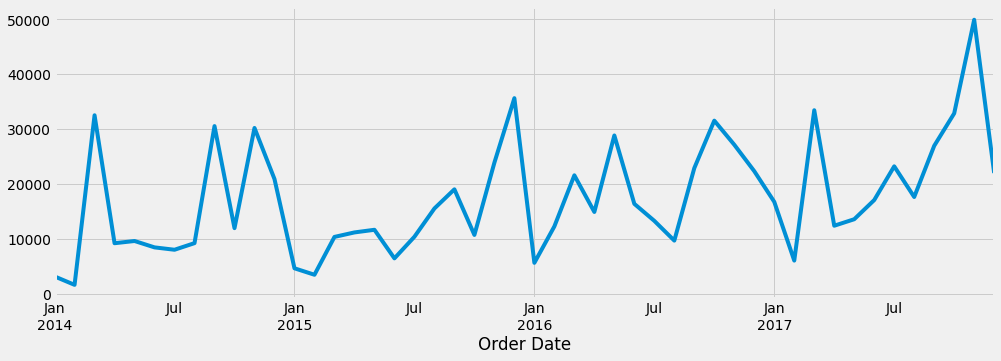

In [ ]:
Technology_monthly['Sales'].plot();

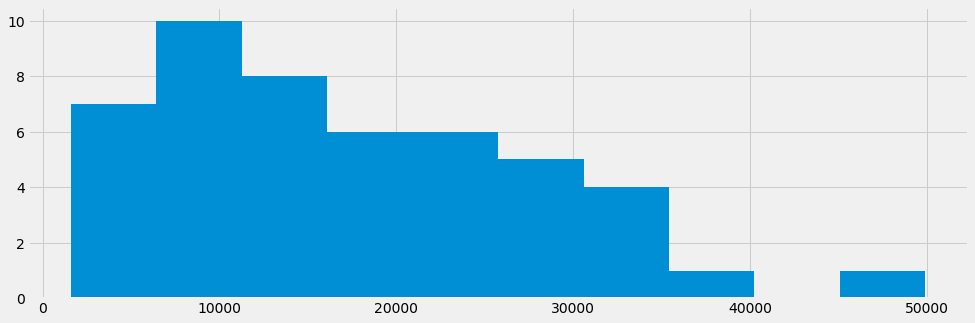

In [ ]:
Technology_monthly['Sales'].hist();

- split the time series into 2 contiguous sequences. 

- calculate the mean and variance of each group of numbers and compare the values.

In [ ]:
X = Technology_monthly['Sales'].values
split = len(X) / 2
split = int(split)

X1, X2 = X[0:split], X[split:]

mean1, mean2 = X1.mean(), X2.mean()
var1,  var2  = X1.var(),  X2.var()

print('mean1     = {:10.2f}, mean2     = {:10.2f}'.format(mean1, mean2))
print('variance1 = {:10.2f}, variance2 = {:10.2f}'.format(var1,  var2))

mean1     =   14085.79, mean2     =   20753.96
variance1 = 93096702.63, variance2 = 97720479.23


- the mean and variance values are different. But in the same ball-park range.
- Hence the time series is stationary


#### Stationarity test : Method 3 : Augmented Dickey-Fuller test - (ADF) test 

- The intuition behind the test is that it determines how strongly a time series is defined by a trend. (i.e no stationarity)

$ H_0 : $ - time series is __not stationary __

$ H_A : $ - time series is stationary 

p-value <= 0.05: Reject the null hypothesis ($H_0$), the data does not have a unit root and is stationary.

> p-value > 0.05: Fail to reject the null hypothesis ($H_0$), the data has a unit root and is non-stationary.

In [ ]:
for year in np.unique(Technology.Year):
    #detect_trend(data_grouped.loc[str(year)]['Sales'].values)

    X = Technology.loc[str(year)]['Sales'].values

    result = adfuller(X)
    
    print('\nFor the year : ', year)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')

    for key, value in result[4].items():
        print('\t%5s: %8.3f' % (key, value))

X = Technology['Sales'].values

result = adfuller(X)

print('\nFor the CONSOLIDATED 4 years')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%5s: %8.3f' % (key, value)) 


For the year :  2014
ADF Statistic: -13.348559
p-value: 0.000000
Critical Values:
	   1%:   -3.468
	   5%:   -2.878
	  10%:   -2.576

For the year :  2015
ADF Statistic: -12.599571
p-value: 0.000000
Critical Values:
	   1%:   -3.466
	   5%:   -2.877
	  10%:   -2.575

For the year :  2016
ADF Statistic: -13.891029
p-value: 0.000000
Critical Values:
	   1%:   -3.461
	   5%:   -2.875
	  10%:   -2.574

For the year :  2017
ADF Statistic: -15.631518
p-value: 0.000000
Critical Values:
	   1%:   -3.458
	   5%:   -2.874
	  10%:   -2.573

For the CONSOLIDATED 4 years
ADF Statistic: -28.189457
p-value: 0.000000
Critical Values:
	   1%:   -3.438
	   5%:   -2.865
	  10%:   -2.569


#### conclusion

1. Consolidated years - p-value is less than .05 or .01. hence H0 can be rejected. 
3. H0 : Not stationary
2. Means TS is stationary
4. Yearly- p-value method : p-value is $\lt$ 0.05 so we reject the null hypothesis for yearly TS
  

# Reduce Noise

Aggregation

Smoothing

Polynomial Fitting


#### 1. Smoothing - Moving average

In this approach, we take average of ‘k’ consecutive values depending on the frequency of time series. Here we can take the average over the past 1 year, i.e. last 12 values. Pandas has specific functions defined for determining rolling statistics.

In [ ]:
ts=Technology_monthly['Sales']

In [ ]:
moving_avg = ts.rolling(window=12).mean()

In [ ]:
moving_avg.head()

Order Date
2014-01-31   NaN
2014-02-28   NaN
2014-03-31   NaN
2014-04-30   NaN
2014-05-31   NaN
Freq: M, Name: Sales, dtype: float64

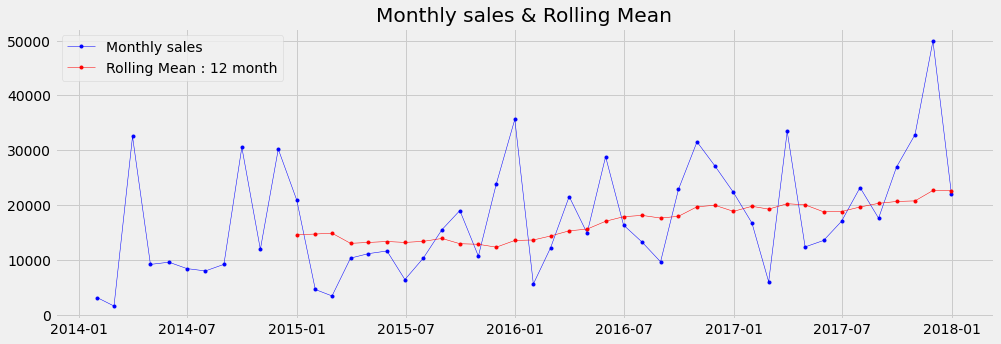

In [ ]:
plt.plot(ts, marker='.', linestyle='-', linewidth=0.5, label='Monthly sales', c='b')
plt.plot(moving_avg, marker='.', linestyle='-', linewidth=0.5, color='red', label='Rolling Mean : 12 month');

plt.legend(loc='best')
plt.title('Monthly sales & Rolling Mean');

Lets the rolling means subtract this from the original series(log transformed).

Note that since we are taking average of last 12 values, rolling mean is not defined for first 11 values.

In [ ]:
ts_moving_avg_diff = ts - moving_avg
ts_moving_avg_diff.head(12)

Order Date
2014-01-31            NaN
2014-02-28            NaN
2014-03-31            NaN
2014-04-30            NaN
2014-05-31            NaN
2014-06-30            NaN
2014-07-31            NaN
2014-08-31            NaN
2014-09-30            NaN
2014-10-31            NaN
2014-11-30            NaN
2014-12-31    6286.672583
Freq: M, Name: Sales, dtype: float64

In [ ]:
ts_moving_avg_diff.dropna(inplace=True)

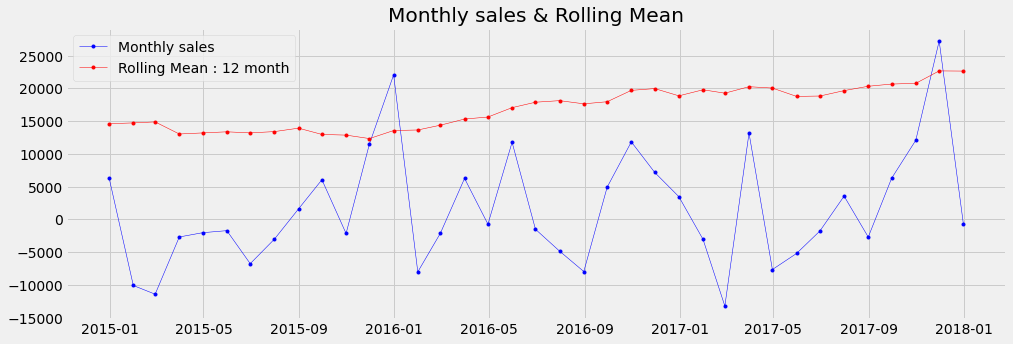

In [ ]:
plt.plot(ts_moving_avg_diff, marker='.', linestyle='-', linewidth=0.5, label='Monthly sales', c='b')
plt.plot(moving_avg, marker='.', linestyle='-', linewidth=0.5, color='red', label='Rolling Mean : 12 month');

plt.legend(loc='best')
plt.title('Monthly sales & Rolling Mean');

## Decomposition of a time series into its components(trend, seasonality,noise):

You can do a classical decomposition of a time series by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual.

The __seasonal_decompose__ in __statsmodels__ implements this conveniently.

visualize our data using a method called time-series decomposition that allows us to decompose our time series into 3 distinct components: 
    - trend, 
    - seasonality, and 
    - noise.

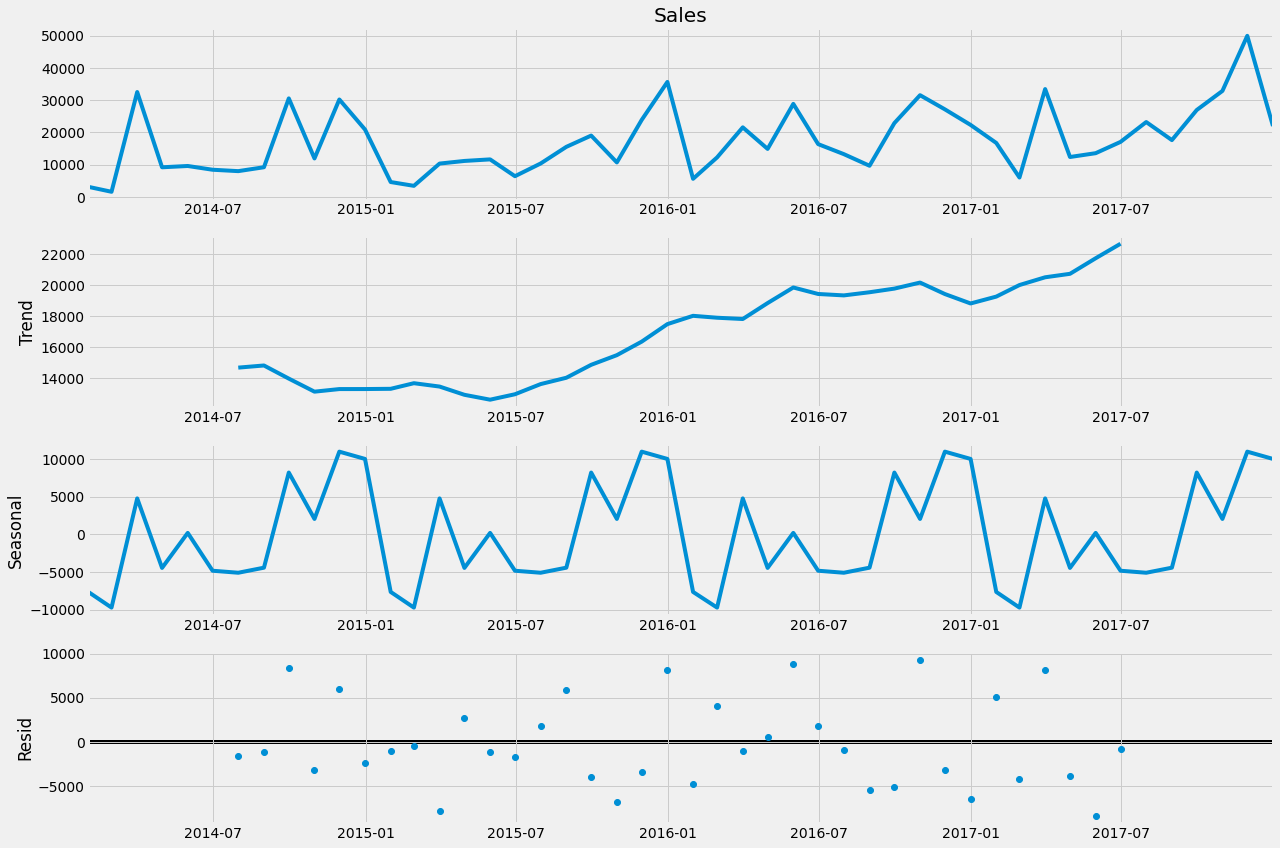

In [ ]:
# Multiplicative Decomposition 

rcParams['figure.figsize'] = 18, 12

result_additive = seasonal_decompose(Technology_monthly['Sales'],
                                     model='additive')

fig = result_additive.plot()

The plot above clearly shows that the sales of Technology is unstable, 
along with its obvious seasonality.We can still see noises.

# ARIMA FORECASTING


- ARIMA, short for __‘Auto Regressive Integrated Moving Average’__ is actually a class of models that ‘explains’ a given time series based on its own past values, that is, its own lags and the lagged forecast errors, so that equation can be used to forecast future values.

- Any ‘non-seasonal’ time series that exhibits patterns and is not a random white noise can be modeled with ARIMA models.

- An ARIMA model is characterized by 3 terms: p, d, q where,

    - p is the order of the AR term
    - q is the order of the MA term
    - d is the number of differencing required to make the time series stationary

If a time series, has seasonal patterns, then you need to add seasonal terms and it becomes SARIMA, short for ‘Seasonal ARIMA’. 

#### d term

- The first step to build an ARIMA model is to make the time series stationary. Why?

- Because, term ‘Auto Regressive’ in ARIMA means it is a linear regression model that uses its own lags as predictors. Linear regression models, as you know, work best when the predictors are not correlated and are independent of each other.

- The most common approach is to __difference__ it. That is, subtract the previous value from the current value. Sometimes, depending on the complexity of the series, more than one differencing may be needed.

- The value of __d__, therefore, is the minimum number of differencing needed to make the series stationary. 

- And if the time series is already stationary, then d = 0.

#### Next, what are the ‘p’ and ‘q’ terms?

- ‘p’ is the order of the ‘Auto Regressive’ (AR) term. It refers to the number of lags of Y to be used as predictors. 

- And ‘q’ is the order of the ‘Moving Average’ (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA Model.

** ARIMA model in words:**

Predicted $Y_t$ = Constant + Linear combination Lags of Y (upto p lags) + Linear Combination of Lagged forecast errors (upto q lags)